In [24]:
#线性回归，又称最小二乘法（ordinary least square，OLS）
#导入数据集拆分工具
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)
#输出拟合直线的系数和截距
print('直线方程={:.3f}'.format(lr.coef_[0]),'x1+','{:.3f}'.format(lr.coef_[1]),'x2+','{}'.format(lr.intercept_))
#由于有两个特征，每个特征值对应coef_的NumPy数组中的元素

#线性回归的性能表现,查看一下拟合模型的得分
print('训练数据集得分：{:.3f}'.format(lr.score(X_train, y_train)))
print('测试数据集得分：{:.3f}'.format(lr.score(X_test, y_test)))
#能得这么高分其实是没加噪声啦@_@

直线方程=70.386 x1+ 7.432 x2+ -1.4210854715202004e-14
训练数据集得分：1.000
测试数据集得分：1.000


In [7]:
#测试下糖尿病数据集
from sklearn.datasets import load_diabetes
#分别载入数据集的数据和目标分类到X和y
X, y = load_diabetes().data, load_diabetes().target
#将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
#使用线性回归模型进行拟合
lr = LinearRegression().fit(X_train, y_train)

#查看得分
print('训练数据集得分:{:.3f}'.format(lr.score(X_train, y_train)))
print('测试数据集得分:{:.3f}'.format(lr.score(X_test, y_test)))

# 这次模型的分数下降了许多T_T，这是由于实际数据的复杂度比手工合成的数据会高很多，
# 使其表现大幅下降，同时分数差异那么大也说明了标准线性回归出现过拟合的问题。为此需要找一个模型能够控制模型的复杂度，即岭回归

测试数据集得分:0.530
训练数据集得分:0.459


In [9]:
# 使用L2正则化的线性模型——岭回归，一种改良的OLS。
# 这种保留全部特征变量，只改变特征变量的系数值来避免过拟合的方法被称为L2正则化。

#导入岭回归
from sklearn.linear_model import Ridge
#使用岭回归对数据进行拟合
ridge = Ridge().fit(X_train, y_train)
print('训练数据集得分:{:.3f}'.format(ridge.score(X_train, y_train)))
print('测试数据集得分:{:.3f}'.format(ridge.score(X_test, y_test)))

# 可以看到两者都比线性回归得分低，同时这两者得分竟然一致（JOJO哒，这也在你的计算之中吗）。
# 岭回归模型相对线性回归复杂度低，降低过拟合的可能性。
# 同时模型复杂度低，意味着在训练集中表现越差，但模型在泛化方面的表现会更好。


测试数据集得分:0.433
训练数据集得分:0.433


In [23]:
#岭回归是在模型的简单性(使系数coef_趋近于零)和它的训练集上的性能之间实现平衡的一种模型。
#我们可以通过改变模型参数alpha(默认为1)来改变模型复杂度(alpha↑complexity↓generalization↑)和训练集的性能(alpha↑performance↓)。

#我们将alpha值设为10看看效果
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('alpha为1时的训练数据集得分:{:.3f}'.format(ridge10.score(X_train, y_train)))
print('alpha为1时的测试数据集得分:{:.3f}\n'.format(ridge10.score(X_test, y_test)))
#可以看到分数明显下降了，同时可以看到训练数据集比测试数据集分数要高，说明模型出现过拟合的现象了，可以通过升高alpha值来降低过拟合的程度。

#降低alpha值会降低对系数的限制，我们试试将alpha值降到0.1看看，这时候系统接近于线性拟合模型
ridge0_1 = Ridge(alpha=0.1).fit(X_train, y_train)
print('alpha为0.1时的训练数据集得分:{:.3f}'.format(ridge0_1.score(X_train, y_train)))
print('alpha为0.1时的测试数据集得分:{:.3f}'.format(ridge0_1.score(X_test, y_test)))

#可以看出alpha值为0.1时的模型比线性回归模型的训练数据集分数低一些，但训练数据集得分却有轻微提升。

alpha为1时的测试数据集得分:0.151
alpha为1时的训练数据集得分:0.162

alpha为0.1时的测试数据集得分:0.522
alpha为0.1时的训练数据集得分:0.473


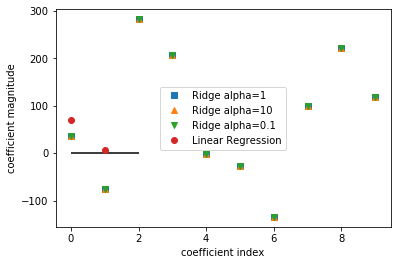

In [27]:
#为了能更直观地查看不同alpha值对应模型的不同之处，可通过matplotlib提供的画图工具显示对应模型的系数coef_。
import matplotlib.pyplot as plt
#绘制alpha=1时模型系数
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
#绘制alpha=10时模型系数
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
#绘制alpha=0.1时模型系数
plt.plot(ridge0_1.coef_, 'v', label='Ridge alpha=0.1')
#绘制线性回归模型系数
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()

# 横坐标是特征变量的序号，纵坐标是特征变量的数量级。
# 当alpha为10时特征变量系数大多在0附近。
# 当alpha为1时，特征变量系数明显增大
# 当alpha为0.1时，特征变量就更大了，而且大部分和线性回归模型的特征变量系数重叠在一起。
# 由于线性回归模型没有进行任何正则化处理，所以有些特征变量系数非常大，都跑到地图外面去了:3
